# 🧠 Stacking Regressor

## What is Stacking?

**Stacking** is an ensemble learning technique that combines multiple different regression models (called *base learners*) and trains a **meta-learner** on their predictions.

Unlike bagging and boosting, stacking:
- Uses **heterogeneous models** (e.g., linear, tree, SVR)
- Aims to **capture diverse modeling perspectives**
- Trains a second-level model to optimally combine base model predictions

---

## 🏗️ Structure

1. **Base Learners**: Trained on the original dataset
2. **Meta Learner**: Trained on the *predictions* made by the base learners

The final prediction is made by passing input through all base models and combining their outputs via the meta-learner.


# 📘 Interpreting Meta-Model Coefficients in Stacking

In a **stacking regressor**, the meta-model learns to combine the predictions from multiple base models. When the meta-model is a **linear regression**, its coefficients provide insight into how much it "trusts" each base model.

---

## 🧠 Meta-Model Equation

Suppose the meta-model is:

\[
\hat{y} = \alpha_1 \cdot \hat{y}^{(1)} + \alpha_2 \cdot \hat{y}^{(2)} + \cdots + \alpha_M \cdot \hat{y}^{(M)} + \beta
\]

where:
- \( \hat{y}^{(i)} \) is the prediction from base model \( i \)
- \( \alpha_i \) is the coefficient learned for that base model
- \( \beta \) is the intercept

---

## 🔍 Interpretation of Coefficients

| Coefficient \( \alpha_i \) | Meaning |
|------------------------------|---------|
| **Large & positive**         | Meta-model **trusts** this base model and uses it heavily |
| **Near 0**                   | The base model contributes **very little** |
| **Negative**                 | The meta-model is **correcting** for this base model’s mistakes |

---

## 📦 Example

If:
```python
meta_model.coef_ = [0.6, 0.2, 0.1]
```

Then:
- Base model 1 contributes 60% of the prediction
- Base model 2 contributes 20%
- Base model 3 contributes 10%

---

## ⚠️ Note

- Coefficients are **interpretable only if all base predictions are on the same scale**
- If you use a non-linear meta-model (e.g., tree), interpretation is more complex and may require feature importance analysis.


Stacking R²: 0.9232738772236788
Stacking MSE: 0.152466600535118
Meta-Model Coefficients: [0.08027209 0.59594102 0.51942975]


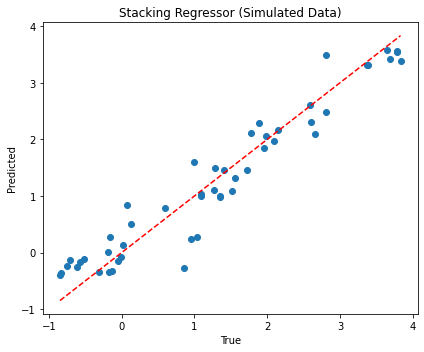

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(42)
X = np.random.rand(200, 5)
y = 3 * X[:, 0] + np.sin(2 * np.pi * X[:, 1]) + np.random.normal(0, 0.2, 200)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define base learners and meta-learner
base_learners = [
    ("lr", LinearRegression()),
    ("dt", DecisionTreeRegressor(max_depth=4)),
    ("knn", KNeighborsRegressor(n_neighbors=10))
]
meta_learner = LinearRegression()

# Stacking model
stack = StackingRegressor(estimators=base_learners, final_estimator=meta_learner, cv=5)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

# Evaluate
print("Stacking R²:", r2_score(y_test, y_pred))
print("Stacking MSE:", mean_squared_error(y_test, y_pred))

# Show meta-model coefficients
print("Meta-Model Coefficients:", meta_model.coef_)

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Stacking Regressor (Simulated Data)")
plt.tight_layout()
plt.show()


Stacking R² (Real): 0.7031610958783068
Stacking MSE (Real): 0.39278261217639326


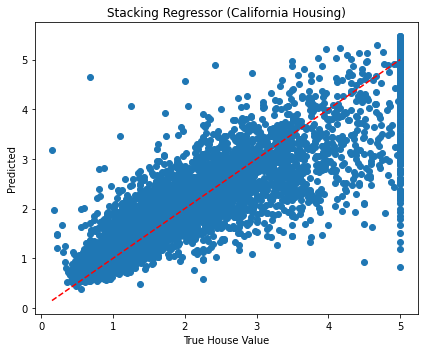

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load and scale
data = fetch_california_housing()
X_real = data.data
y_real = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_real, random_state=42)

# Define stacking model (reuse learners from before)
stack_real = StackingRegressor(estimators=base_learners, final_estimator=meta_learner, cv=5)
stack_real.fit(X_train, y_train)
y_pred_real = stack_real.predict(X_test)

# Evaluate
print("Stacking R² (Real):", r2_score(y_test, y_pred_real))
print("Stacking MSE (Real):", mean_squared_error(y_test, y_pred_real))

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_real)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True House Value")
plt.ylabel("Predicted")
plt.title("Stacking Regressor (California Housing)")
plt.tight_layout()
plt.show()
